### Water Cherenkov Calibration - MuTe

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy.ndimage as ndimage
import re

# This ensures visualizations are plotted inside the notebook
%matplotlib inline

In [2]:
def derivate(y,x):
    
    N = len(y)

    dy = np.zeros(N-1) 

    for i in range(N-1):
    
        dy[i] = (y[i+1] - y[i])/ (x[i+1] - x[i])
        
    return dy

In [3]:
def smooth (data,win):
    
    N = len(data)
    step = (win-1)/2
    out = np.zeros(N)
    
    for j in range(step,N-step):
        valor = 0
        for k in range (-step,step + 1):
            valor = valor + data[j+k]

        out [j] = valor/win
    return out

Rate data depending on the thresholds and bias voltages were obtained by means the following bash line:

$$for i in {400..800..10}; do cat 'WCD_Cal_v'$i'_u110'*.dat | awk '{if($1=="#" && $2=="t"){cnt++};if($1=="#" && $2=="x" && $3=="h" && cnt!=0){vec[j]=cnt;j++;cnt=0}}END{for(k in vec){sum+=vec[k]};print '"$i"', sum/j;j=0}' >> calib_U110.dat;done$$

In [5]:
U110 = np.loadtxt('data/calib_U110.dat')
U160 = np.loadtxt('data/calib_U160.dat')
U210 = np.loadtxt('data/calib_U210.dat')

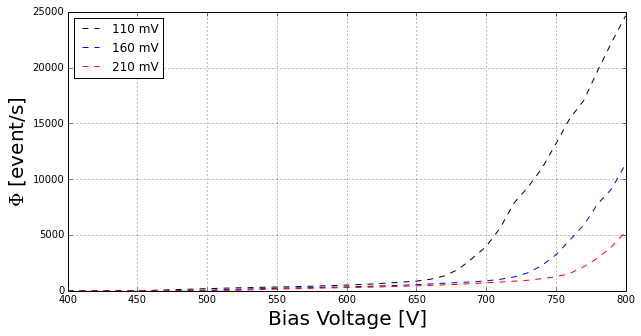

In [5]:
fig = plt.figure(figsize=(10, 5))
plt.plot(U110[:,0],U110[:,1], '--k')
plt.plot(U160[:,0],U160[:,1], '--b')
plt.plot(U210[:,0],U210[:,1], '--r')
plt.xlabel("Bias Voltage [V]", fontsize = 20)
plt.ylabel("$\Phi$ [event/s]", fontsize = 20)
plt.legend(["110 mV", "160 mV", "210 mV"], loc=2)
plt.grid()
plt.show()

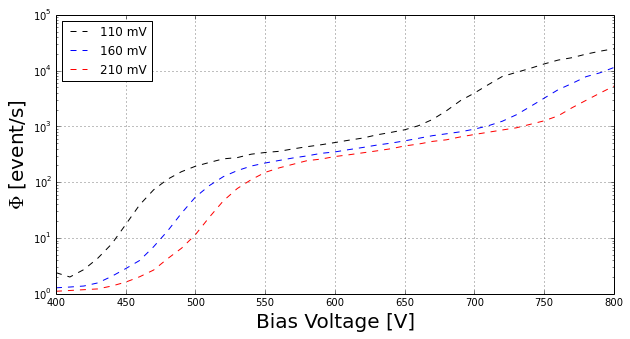

In [6]:
fig = plt.figure(figsize=(10, 5))
plt.semilogy(U110[:,0],U110[:,1], '--k')
plt.plot(U160[:,0],U160[:,1], '--b')
plt.plot(U210[:,0],U210[:,1], '--r')
plt.xlabel("Bias Voltage [V]", fontsize = 20)
plt.ylabel("$\Phi$ [event/s]", fontsize = 20)
plt.legend(["110 mV", "160 mV", "210 mV"], loc=2)
plt.grid()
plt.show()

### Optimum point location

In order to find the optimum operation point for the WCD, the minimum of the flux logarithm was computed as follows,

$$\frac{d(\log \Phi)}{dv} \approx 0$$

In [7]:
logU110 = np.log10(U110[:,1])
logU160 = np.log10(U160[:,1])
logU210 = np.log10(U210[:,1])

dLogU110 = derivate(logU110, U110[:,0])
dLogU160 = derivate(logU160, U160[:,0])
dLogU210 = derivate(logU210, U210[:,0])
    

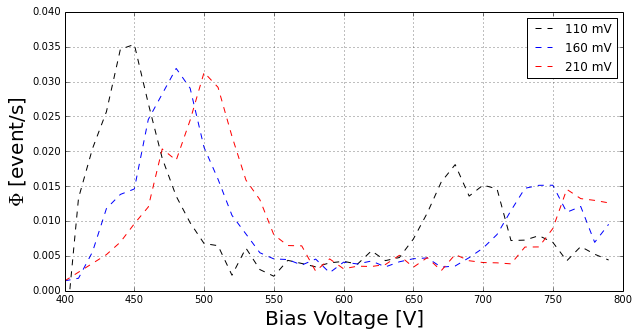

In [8]:
fig = plt.figure(figsize=(10, 5))
plt.plot(U110[:-1,0],dLogU110, '--k')
plt.plot(U160[:-1,0],dLogU160, '--b')
plt.plot(U210[:-1,0],dLogU210, '--r')
plt.xlabel("Bias Voltage [V]", fontsize = 20)
plt.ylabel("$\Phi$ [event/s]", fontsize = 20)
plt.legend(["110 mV", "160 mV", "210 mV"], loc=1)
plt.axis([400,800,0,0.04])
plt.grid()
plt.show()

In [9]:
minU110 = np.abs(dLogU110).argmin()
minU160 = np.abs(dLogU160[2:-1]).argmin()
minU210 = np.abs(dLogU210[2:-1]).argmin()

In [10]:
print "Optimum for U110 = " + str(minU110)
print "Optimum for U160 = " + str(minU160)
print "Optimum for U210 = " + str(minU210)

Optimum for U110 = 15
Optimum for U160 = 17
Optimum for U210 = 14


In [11]:
dLogU160

array([0.0014212 , 0.00180289, 0.0055704 , 0.01178936, 0.01381928,
       0.01459766, 0.02455236, 0.02822352, 0.03188149, 0.02904712,
       0.02055094, 0.0160005 , 0.01081747, 0.00814987, 0.00545503,
       0.00457337, 0.00448134, 0.00368917, 0.00454787, 0.00259367,
       0.00410165, 0.00384811, 0.00427044, 0.00342956, 0.00415772,
       0.00459611, 0.00471071, 0.00338797, 0.00355544, 0.0047528 ,
       0.00612312, 0.00806868, 0.01150277, 0.01469433, 0.01512277,
       0.01513601, 0.01126167, 0.01208747, 0.00694987, 0.00952948])

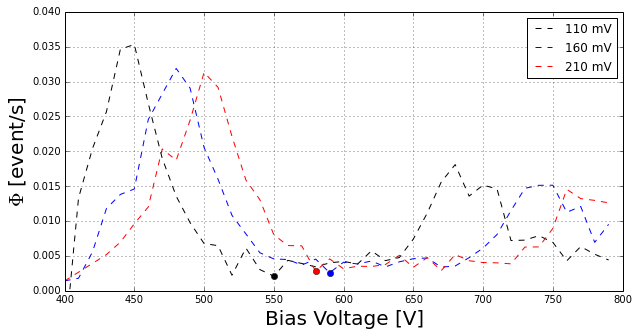

In [12]:
fig = plt.figure(figsize=(10, 5))
plt.plot(U110[:-1,0],dLogU110, '--k')
plt.plot(U160[:-1,0],dLogU160, '--b')
plt.plot(U210[:-1,0],dLogU210, '--r')
plt.plot(U110[minU110,0],dLogU110[minU110], 'ok')
plt.plot(U160[minU160+2,0],dLogU160[minU160+2], 'ob')
plt.plot(U210[minU210+2,0],dLogU210[minU210+2], 'or')
plt.xlabel("Bias Voltage [V]", fontsize = 20)
plt.ylabel("$\Phi$ [event/s]", fontsize = 20)
plt.legend(["110 mV", "160 mV", "210 mV"], loc=1)
plt.axis([400,800,0,0.04])
plt.grid()
plt.show()

In [13]:
sLogU110 = smooth(dLogU110,3)
sLogU160 = smooth(dLogU160,3)
sLogU210 = smooth(dLogU210,3)

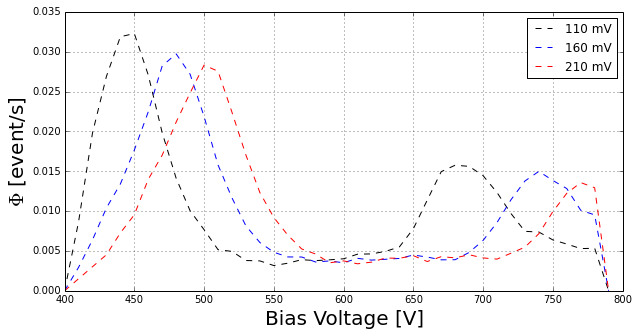

In [14]:
fig = plt.figure(figsize=(10, 5))
plt.plot(U110[:-1,0],sLogU110, '--k')
plt.plot(U160[:-1,0],sLogU160, '--b')
plt.plot(U210[:-1,0],sLogU210, '--r')
plt.xlabel("Bias Voltage [V]", fontsize = 20)
plt.ylabel("$\Phi$ [event/s]", fontsize = 20)
plt.legend(["110 mV", "160 mV", "210 mV"], loc=1)
plt.grid()
plt.show()

In [15]:
sminU110 = np.abs(sLogU110[2:-3]).argmin()
sminU160 = np.abs(sLogU160[2:-3]).argmin()
sminU210 = np.abs(sLogU210[2:-3]).argmin()

In [16]:
print "Optimum for U110 = " + str(sminU110)
print "Optimum for U160 = " + str(sminU160)
print "Optimum for U210 = " + str(sminU210)

Optimum for U110 = 13
Optimum for U160 = 18
Optimum for U210 = 17


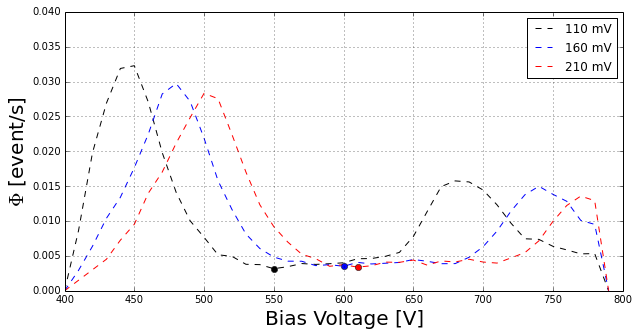

In [17]:
fig = plt.figure(figsize=(10, 5))
plt.plot(U110[:-1,0],sLogU110, '--k')
plt.plot(U160[:-1,0],sLogU160, '--b')
plt.plot(U210[:-1,0],sLogU210, '--r')
plt.plot(U110[sminU110+2,0],sLogU110[sminU110+2], 'ok')
plt.plot(U160[sminU160+2,0],sLogU160[sminU160+2], 'ob')
plt.plot(U210[sminU210+2,0],sLogU210[sminU210+2], 'or')
plt.xlabel("Bias Voltage [V]", fontsize = 20)
plt.ylabel("$\Phi$ [event/s]", fontsize = 20)
plt.legend(["110 mV", "160 mV", "210 mV"], loc=1)
plt.axis([400,800,0,0.04])
plt.grid()
plt.show()

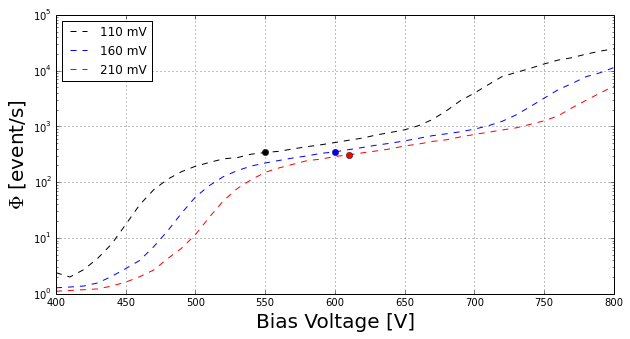

In [18]:
fig = plt.figure(figsize=(10, 5))
plt.semilogy(U110[:,0],U110[:,1], '--k')
plt.plot(U160[:,0],U160[:,1], '--b')
plt.plot(U210[:,0],U210[:,1], '--r')
plt.plot(U110[sminU110+2,0],U110[sminU110+2,1], 'ok')
plt.plot(U160[sminU160+2,0],U160[sminU160+2,1], 'ob')
plt.plot(U210[sminU210+2,0],U210[sminU210+2,1], 'or')
plt.xlabel("Bias Voltage [V]", fontsize = 20)
plt.ylabel("$\Phi$ [event/s]", fontsize = 20)
plt.legend(["110 mV", "160 mV", "210 mV"], loc=2)
plt.grid()
plt.show()

### PMT basis calibration

In [20]:
value = np.linspace(0,1000,21)
bias = [6.9,100.8,192.5,283.1,374.3,462,553,644,734,824,915,1004,1094,1183,1273,1365,1453,1544,1633,1722,1811]

In [21]:
# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(value,bias)
line = slope*value+intercept
print "slope = " + str(slope)
print "intercept = " + str(intercept)

slope = 1.801722077922078
intercept = 12.072294372294323


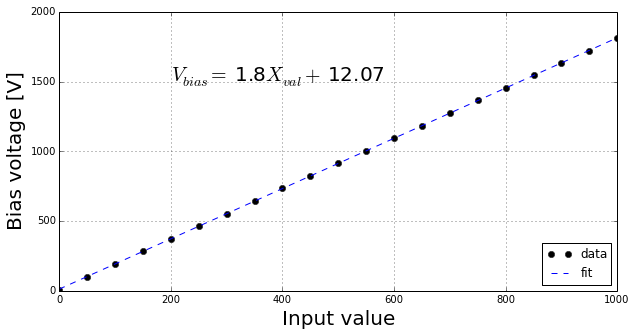

In [22]:
fig = plt.figure(figsize=(10, 5))
plt.plot(value,bias, 'ok')
plt.plot(value, line, '--b')
plt.xlabel("Input value", fontsize = 20)
plt.ylabel("Bias voltage [V]", fontsize = 20)
plt.legend(["data","fit"], loc=4)
plt.text(200,1500, '$V_{bias}=$ '+ str(round(slope,2)) + '$X_{val} +$ ' + str(round(intercept,2)), fontsize = 20)
plt.grid()
plt.show()

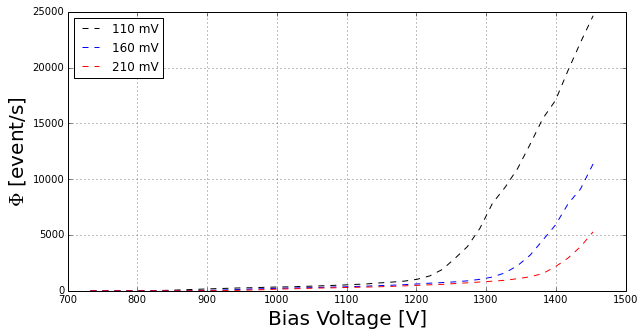

In [23]:
fig = plt.figure(figsize=(10, 5))
plt.plot(U110[:,0]*slope+intercept,U110[:,1], '--k')
plt.plot(U160[:,0]*slope+intercept,U160[:,1], '--b')
plt.plot(U210[:,0]*slope+intercept,U210[:,1], '--r')
plt.xlabel("Bias Voltage [V]", fontsize = 20)
plt.ylabel("$\Phi$ [event/s]", fontsize = 20)
plt.legend(["110 mV", "160 mV", "210 mV"], loc=2)
plt.grid()
plt.show()

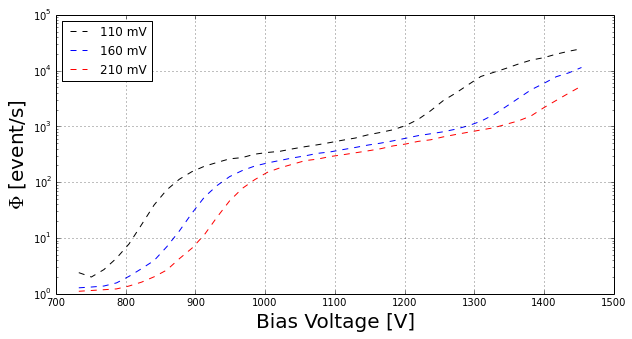

In [24]:
fig = plt.figure(figsize=(10, 5))
plt.semilogy(U110[:,0]*slope+intercept,U110[:,1], '--k')
plt.plot(U160[:,0]*slope+intercept,U160[:,1], '--b')
plt.plot(U210[:,0]*slope+intercept,U210[:,1], '--r')
plt.xlabel("Bias Voltage [V]", fontsize = 20)
plt.ylabel("$\Phi$ [event/s]", fontsize = 20)
plt.legend(["110 mV", "160 mV", "210 mV"], loc=2)
plt.grid()
plt.show()

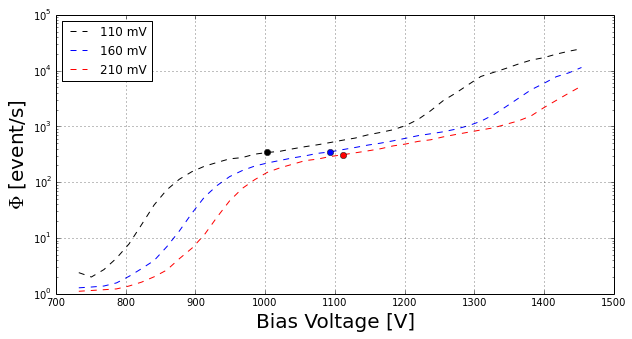

In [25]:
fig = plt.figure(figsize=(10, 5))
plt.semilogy(U110[:,0]*slope+intercept,U110[:,1], '--k')
plt.plot(U160[:,0]*slope+intercept,U160[:,1], '--b')
plt.plot(U210[:,0]*slope+intercept,U210[:,1], '--r')
plt.plot(U110[sminU110+2,0]*slope+intercept,U110[sminU110+2,1], 'ok')
plt.plot(U160[sminU160+2,0]*slope+intercept,U160[sminU160+2,1], 'ob')
plt.plot(U210[sminU210+2,0]*slope+intercept,U210[sminU210+2,1], 'or')
plt.xlabel("Bias Voltage [V]", fontsize = 20)
plt.ylabel("$\Phi$ [event/s]", fontsize = 20)
plt.legend(["110 mV", "160 mV", "210 mV"], loc=2)
plt.grid()
plt.show()

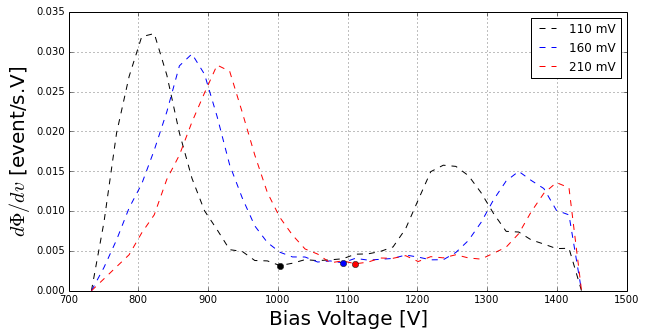

In [26]:
fig = plt.figure(figsize=(10, 5))
plt.plot(U110[:-1,0]*slope+intercept,sLogU110, '--k')
plt.plot(U160[:-1,0]*slope+intercept,sLogU160, '--b')
plt.plot(U210[:-1,0]*slope+intercept,sLogU210, '--r')
plt.plot(U110[sminU110+2,0]*slope+intercept,sLogU110[sminU110+2], 'ok')
plt.plot(U160[sminU160+2,0]*slope+intercept,sLogU160[sminU160+2], 'ob')
plt.plot(U210[sminU210+2,0]*slope+intercept,sLogU210[sminU210+2], 'or')
plt.xlabel("Bias Voltage [V]", fontsize = 20)
plt.ylabel("$d \Phi / dv$ [event/s.V]", fontsize = 20)
plt.legend(["110 mV", "160 mV", "210 mV"], loc=1)
plt.grid()
plt.show()

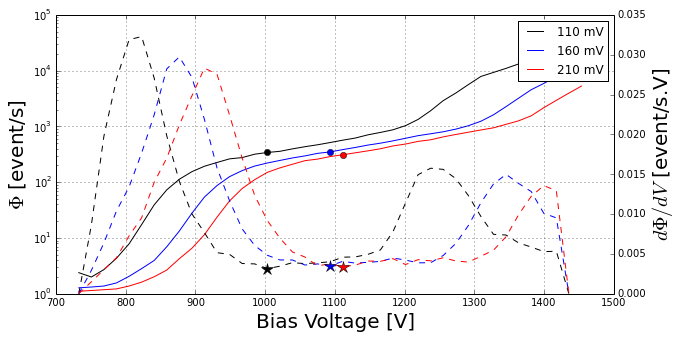

In [31]:
fig = plt.figure(figsize=(10, 5))
plt.semilogy(U110[:,0]*slope+intercept,U110[:,1], '-k')
plt.plot(U160[:,0]*slope+intercept,U160[:,1], '-b')
plt.plot(U210[:,0]*slope+intercept,U210[:,1], '-r')
plt.plot(U110[sminU110+2,0]*slope+intercept,U110[sminU110+2,1], 'ok')
plt.plot(U160[sminU160+2,0]*slope+intercept,U160[sminU160+2,1], 'ob')
plt.plot(U210[sminU210+2,0]*slope+intercept,U210[sminU210+2,1], 'or')

plt.xlabel("Bias Voltage [V]", fontsize = 20)
plt.ylabel("$\Phi$ [event/s]", fontsize = 20)
plt.legend(["110 mV", "160 mV", "210 mV"], loc=1)
plt.grid()

ax2 = plt.twinx()
plt.plot(U110[:-1,0]*slope+intercept,sLogU110, '--k')
plt.plot(U160[:-1,0]*slope+intercept,sLogU160, '--b')
plt.plot(U210[:-1,0]*slope+intercept,sLogU210, '--r')
plt.plot(U110[sminU110+2,0]*slope+intercept,sLogU110[sminU110+2], '*k', markersize=12)
plt.plot(U160[sminU160+2,0]*slope+intercept,sLogU160[sminU160+2], '*b', markersize=12)
plt.plot(U210[sminU210+2,0]*slope+intercept,sLogU210[sminU210+2], '*r', markersize=12)
plt.ylabel("$d \Phi / dV$ [event/s.V]", fontsize = 20)

#plt.savefig('OptWCD.eps', format='eps', dpi=1000)

plt.show()

### 2019-11 calibration

In [8]:
U110 = np.loadtxt('../Calibration_2019_11/calib_U110.dat')
U160 = np.loadtxt('../Calibration_2019_11/calib_U160.dat')
U210 = np.loadtxt('../Calibration_2019_11/calib_U210.dat')

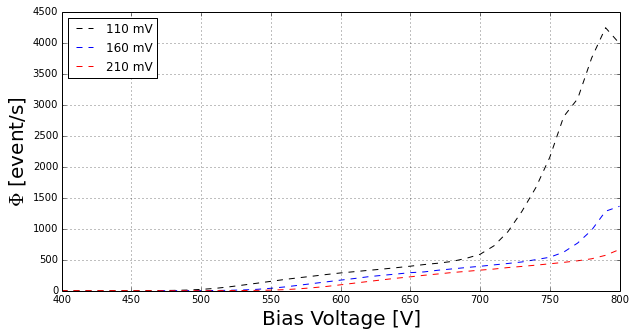

In [9]:
fig = plt.figure(figsize=(10, 5))
plt.plot(U110[:,0],U110[:,1], '--k')
plt.plot(U160[:,0],U160[:,1], '--b')
plt.plot(U210[:,0],U210[:,1], '--r')
plt.xlabel("Bias Voltage [V]", fontsize = 20)
plt.ylabel("$\Phi$ [event/s]", fontsize = 20)
plt.legend(["110 mV", "160 mV", "210 mV"], loc=2)
plt.grid()
plt.show()

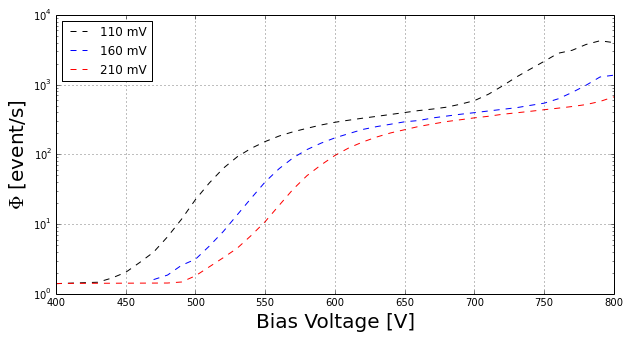

In [10]:
fig = plt.figure(figsize=(10, 5))
plt.semilogy(U110[:,0],U110[:,1], '--k')
plt.plot(U160[:,0],U160[:,1], '--b')
plt.plot(U210[:,0],U210[:,1], '--r')
plt.xlabel("Bias Voltage [V]", fontsize = 20)
plt.ylabel("$\Phi$ [event/s]", fontsize = 20)
plt.legend(["110 mV", "160 mV", "210 mV"], loc=2)
plt.grid()
plt.show()

In [11]:
logU110 = np.log10(U110[:,1])
logU160 = np.log10(U160[:,1])
logU210 = np.log10(U210[:,1])

dLogU110 = derivate(logU110, U110[:,0])
dLogU160 = derivate(logU160, U160[:,0])
dLogU210 = derivate(logU210, U210[:,0])

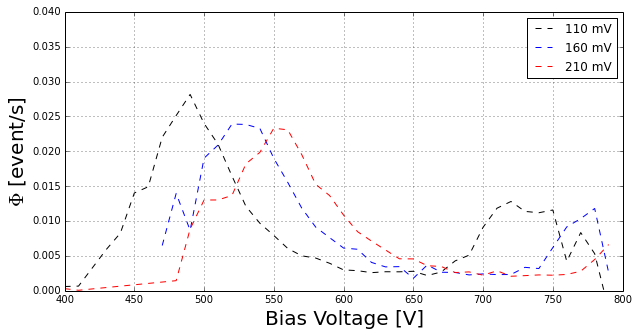

In [12]:
fig = plt.figure(figsize=(10, 5))
plt.plot(U110[:-1,0],dLogU110, '--k')
plt.plot(U160[:-1,0],dLogU160, '--b')
plt.plot(U210[:-1,0],dLogU210, '--r')
plt.xlabel("Bias Voltage [V]", fontsize = 20)
plt.ylabel("$\Phi$ [event/s]", fontsize = 20)
plt.legend(["110 mV", "160 mV", "210 mV"], loc=1)
plt.axis([400,800,0,0.04])
plt.grid()
plt.show()

In [14]:
sLogU110 = smooth(dLogU110,3)
sLogU160 = smooth(dLogU160,3)
sLogU210 = smooth(dLogU210,3)

In [15]:
sminU110 = np.abs(sLogU110[2:-3]).argmin()
sminU160 = np.abs(sLogU160[2:-3]).argmin()
sminU210 = np.abs(sLogU210[2:-3]).argmin()

In [16]:
print "Optimum for U110 = " + str(sminU110)
print "Optimum for U160 = " + str(sminU160)
print "Optimum for U210 = " + str(sminU210)

Optimum for U110 = 23
Optimum for U160 = 21
Optimum for U210 = 25


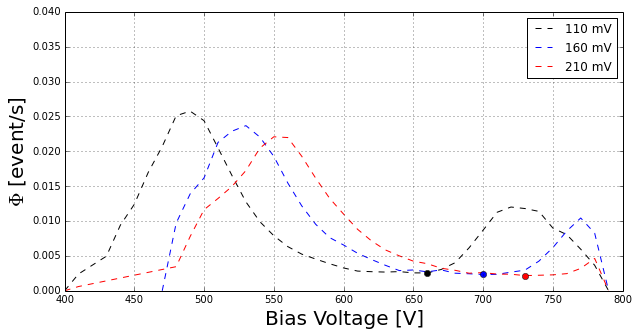

In [17]:
fig = plt.figure(figsize=(10, 5))
plt.plot(U110[:-1,0],sLogU110, '--k')
plt.plot(U160[:-1,0],sLogU160, '--b')
plt.plot(U210[:-1,0],sLogU210, '--r')
plt.plot(U110[sminU110+2,0],sLogU110[sminU110+2], 'ok')
plt.plot(U160[sminU160+2,0],sLogU160[sminU160+2], 'ob')
plt.plot(U210[sminU210+2,0],sLogU210[sminU210+2], 'or')
plt.xlabel("Bias Voltage [V]", fontsize = 20)
plt.ylabel("$\Phi$ [event/s]", fontsize = 20)
plt.legend(["110 mV", "160 mV", "210 mV"], loc=1)
plt.axis([400,800,0,0.04])
plt.grid()
plt.show()